<a href="https://colab.research.google.com/github/tripathishubham1/Mini-Project/blob/main/ML_MINOR_FEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
mkdir images

In [ ]:
pip install bing-image-downloader

In [ ]:
#Gather Data
from bing_image_downloader import downloader
downloader.download("happy expression",limit=50,output_dir='images',adult_filter_off=True)
downloader.download("sad expression",limit=50,output_dir='images',adult_filter_off=True)
downloader.download("laugh expression",limit=50,output_dir='images',adult_filter_off=True)




[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.animals-zone.com/wp-content/uploads/2014/04/angry-cat.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.abstractartistgallery.org/wp-content/uploads/2012/04/abstract-art-a-heart-so-big.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://thewowstyle.com/wp-content/uploads/2015/02/smile-is-the-most-beautiful-expression-in-the-world-smile-always.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://news.toyark.com/wp-content/uploads/sites/4/2019/06/SHF-Cowboy-Bebop-Vicious-001.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.activeboomeradventures.com/wp-content/uploads/2017/02/Boyle-family-Gisborn-Triptych.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://thumbs.dreamstime.com/z/man-whistling-to-anyone-portrait-real-34605686.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://assets.rbl.ms/4164127/980

<BarContainer object of 3 artists>


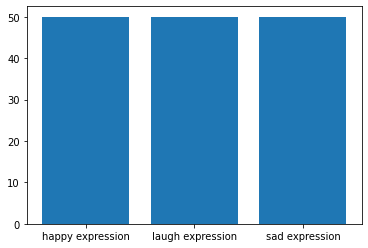

In [ ]:
#Preprocess data

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['happy expression','laugh expression','sad expression']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

unique,count = np.unique(target,return_counts=True)
print(plt.bar(CATEGORIES,count))

In [ ]:
#Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


In [ ]:
#Applying Classification Algoritham SVM
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(y_pred)
print(y_test)

[2 1 2 2 2 1 0 2 1 2 2 0 1 0 0 0 1 2 0 1 1 0 2 0 0 1 2 1 1 2 1 2 1 2 2 1 0
 2 2 1 1 1 1 2 2]
[2 1 2 0 2 1 0 2 1 2 2 0 1 0 0 0 1 2 0 1 1 0 2 0 0 1 2 1 1 2 1 2 1 2 2 1 0
 2 2 1 1 1 1 2 0]


In [ ]:
#Evaluation of the model using Confusion Matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9555555555555556
[[10  0  0]
 [ 0 17  0]
 [ 2  0 16]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      1.00      1.00        17
           2       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



This Model Classify Images Between Three Expression : 
1.Happy Expression
2.Sad Expression
3.Laugh Expression 
Enter URL for Expression Image : https://image.shutterstock.com/image-photo/gloomy-young-sad-asian-blond-600w-1493306978.jpg
(420, 600, 3)
Predicted Expression : sad expression


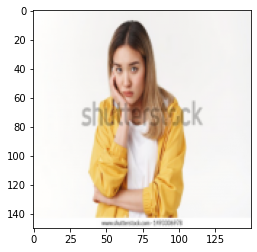

In [ ]:
#Prediction for any new Image


import pickle
pickle.dump(clf,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))

flat_data = []
url = input('This Model Classify Images Between Three Expression : \n1.Happy Expression\n2.Sad Expression\n3.Laugh Expression \nEnter URL for Expression Image : ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
falt_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Expression : {y_out}')